In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
raw_data = pd.read_csv('data/raw_data.csv')
print("Total number:", raw_data.shape[0])
print("Number of columns:", raw_data.shape[1])
dep_del15_counts = raw_data['DEP_DEL15'].value_counts()
print(f"Counts of each value in 'DEP_DEL15':\n{dep_del15_counts}")

Total number: 42636
Number of columns: 31
Counts of each value in 'DEP_DEL15':
DEP_DEL15
0    34564
1     8072
Name: count, dtype: int64


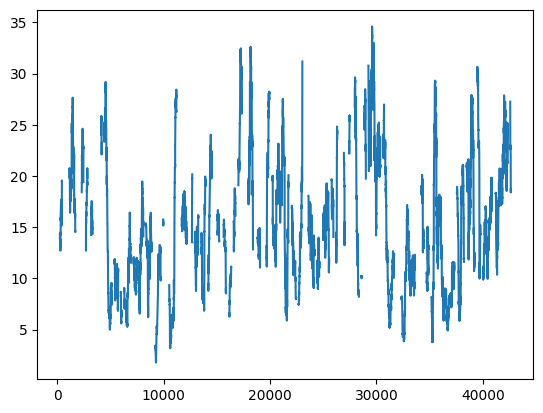

In [24]:
data_target = raw_data['ARR_DELAY_NEW']
# Compute moving average
moving_average = data_target.rolling(window=240).mean()

# Plot the moving average
plt.plot(moving_average)
plt.show()

MONTH                             12
DAY_OF_MONTH                      31
DAY_OF_WEEK                        7
DEP_DEL15                          2
DEP_TIME_BLK                      19
DISTANCE_GROUP                     8
SEGMENT_NUMBER                     9
CONCURRENT_FLIGHTS                71
NUMBER_OF_SEATS                    2
AIRLINE_FLIGHTS_MONTH             12
AIRLINE_AIRPORT_FLIGHTS_MONTH    174
AVG_MONTHLY_PASS_AIRPORT          51
DEPARTING_AIRPORT                 51
LATITUDE                          51
LONGITUDE                         51
PREVIOUS_AIRPORT                 120
PRCP                             246
SNOW                              48
SNWD                              15
TMAX                             112
AWND                             118
dtype: int64


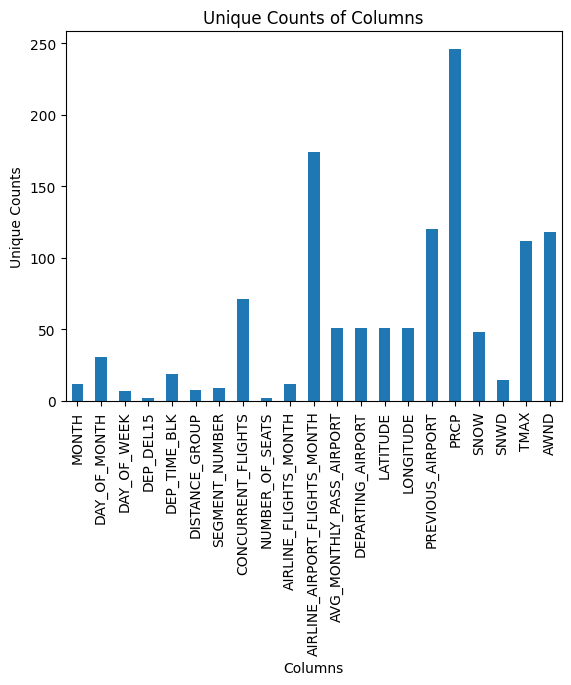

In [11]:
data_encode = pd.read_csv('data/data_cleaned.csv')
data_encode = data_encode.drop(columns=['FLIGHT_NUMBER', 'TOTAL_DELAY', 'AIRPORT_FLIGHTS_MONTH','DATE'])
unique_counts = data_encode.nunique()
print(unique_counts)
unique_counts.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Unique Counts')
plt.title('Unique Counts of Columns')
plt.show()


In [12]:
rnn = pd.read_csv('result/rnn.csv')
hybrid_rnn = pd.read_csv('result/hybrid_rnn.csv')
GRUs = pd.read_csv('result/GRUs.csv')
hybrid_GRUs = pd.read_csv('result/hybrid_GRUs.csv')
LSTM = pd.read_csv('result/lstm.csv')
hybrid_LSTM = pd.read_csv('result/hybrid_lstm.csv')

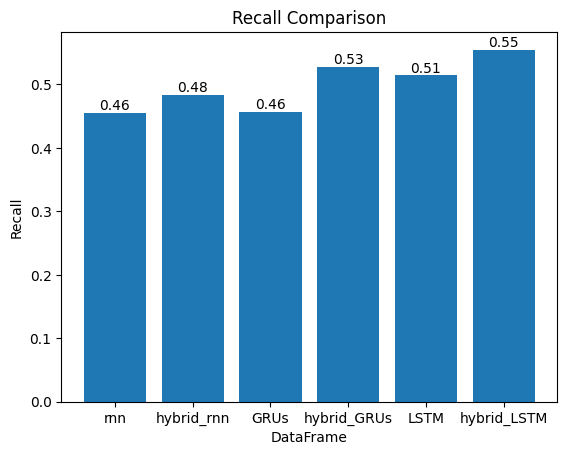

In [16]:
recall_values = [df.loc[1, 'recall'] for df in [rnn, hybrid_rnn, GRUs, hybrid_GRUs, LSTM, hybrid_LSTM]]

plt.bar(['rnn', 'hybrid_rnn', 'GRUs', 'hybrid_GRUs', 'LSTM', 'hybrid_LSTM'], recall_values)
plt.xlabel('DataFrame')
plt.ylabel('Recall')
plt.title('Recall Comparison')

# 在每个柱状图上标注具体的值
for i, value in enumerate(recall_values):
    plt.text(i, value, f"{value:.2f}", ha='center', va='bottom')

plt.show()

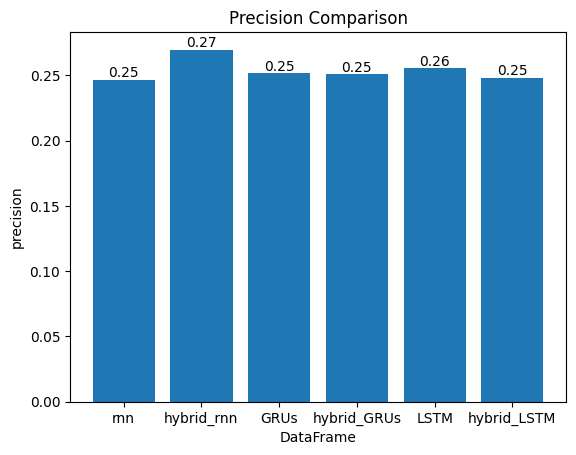

In [20]:
precision = [df.loc[1, 'precision'] for df in [rnn, hybrid_rnn, GRUs, hybrid_GRUs, LSTM, hybrid_LSTM]]

plt.bar(['rnn', 'hybrid_rnn', 'GRUs', 'hybrid_GRUs', 'LSTM', 'hybrid_LSTM'], precision)
plt.xlabel('DataFrame')
plt.ylabel('precision')
plt.title('Precision Comparison')

# 在每个柱状图上标注具体的值
for i, value in enumerate(precision):
    plt.text(i, value, f"{value:.2f}", ha='center', va='bottom')

plt.show()

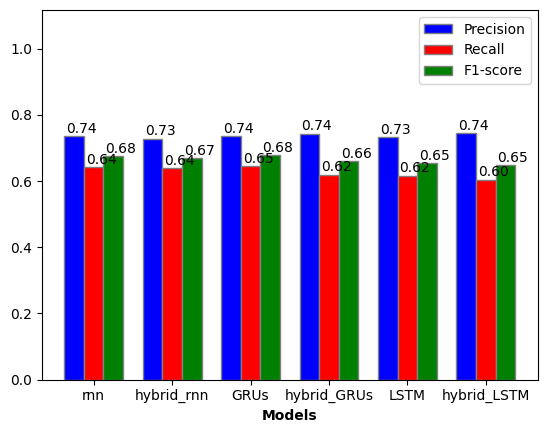

In [37]:
import numpy as np

# Extract weighted avg precision, recall, f1-score for each model
models = ['rnn', 'hybrid_rnn', 'GRUs', 'hybrid_GRUs', 'LSTM', 'hybrid_LSTM']
model_data = []
for model, df in zip(models, [rnn, hybrid_rnn, GRUs, hybrid_GRUs, LSTM, hybrid_LSTM]):
    row = df.loc[4]
    model_data.append([model, row['precision'], row['recall'], row['f1-score']])

# Create a DataFrame
model_scores = pd.DataFrame(model_data, columns=['Model', 'Precision', 'Recall', 'F1-score'])

# Set the width of the bars
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(model_scores['Precision']))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.bar(r1, model_scores['Precision'], color='b', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(r2, model_scores['Recall'], color='r', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(r3, model_scores['F1-score'], color='g', width=barWidth, edgecolor='grey', label='F1-score')

for i in range(len(r1)):
    plt.text(x = r1[i]-0.1, y = model_scores['Precision'][i]+0.01, s = f"{model_scores['Precision'][i]:.2f}", size = 10)
    plt.text(x = r2[i]-0.1, y = model_scores['Recall'][i]+0.01, s = f"{model_scores['Recall'][i]:.2f}", size = 10)
    plt.text(x = r3[i]-0.1, y = model_scores['F1-score'][i]+0.01, s = f"{model_scores['F1-score'][i]:.2f}", size = 10)
    
plt.ylim(0, 1.5*model_scores[['Precision', 'Recall', 'F1-score']].values.max())

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(model_scores['Precision']))], model_scores['Model'])

# Create legend & Show graphic
plt.legend()
plt.show()
